Uber Stock Price Analysis & Forecasting (2019–2025)

Introduction: This project examines Uber’s stock performance through comprehensive data analysis. It also builds forecasting models to predict future price trends.

In [17]:
###Load & Explore Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Loading data into dataframe df
df = pd.read_csv('/Users/nandhu/Downloads/uber_stock_data.csv') 
#date into datatime format
df['Date'] = pd.to_datetime(df['Date'])
#Sets date as index 
df.set_index('Date', inplace=True) 
#Sorts the data by date
df.sort_index(inplace=True) 

#For preview
df.head() 

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500


In [18]:
df = df.asfreq('D')  # Set to daily frequency (It has a row for every single day)
df['Close'] = df['Close'].interpolate() #Fills in any missing 'Close' values using linear interpolation.

#Fills any missing 'Volume' values by carrying forward the previous value.
df['Volume'] = df['Volume'].ffill()

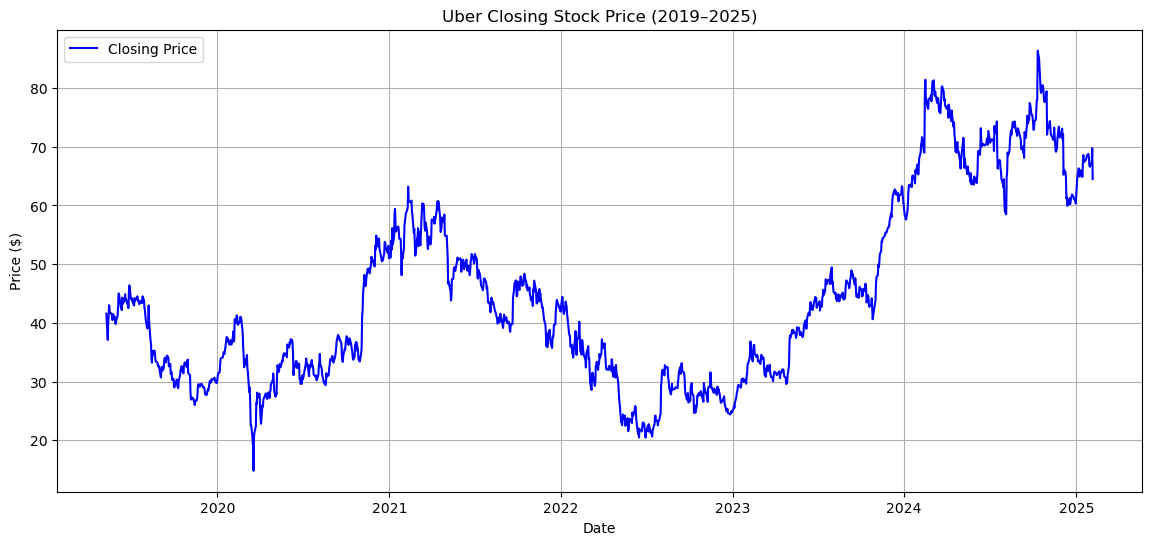

In [19]:
#  3. EDA: Stock Performance Analysis

## 3.1 Plot Closing Price Over Time
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('Uber Closing Stock Price (2019–2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
## 3.2 Highest and Lowest Closing Prices
max_price = df['Close'].max()
min_price = df['Close'].min()
print(f"🔼 Highest Close: ${max_price:.2f} on {df['Close'].idxmax().date()}")
print(f"🔽 Lowest Close:  ${min_price:.2f} on {df['Close'].idxmin().date()}")

🔼 Highest Close: $86.34 on 2024-10-11
🔽 Lowest Close:  $14.82 on 2020-03-18


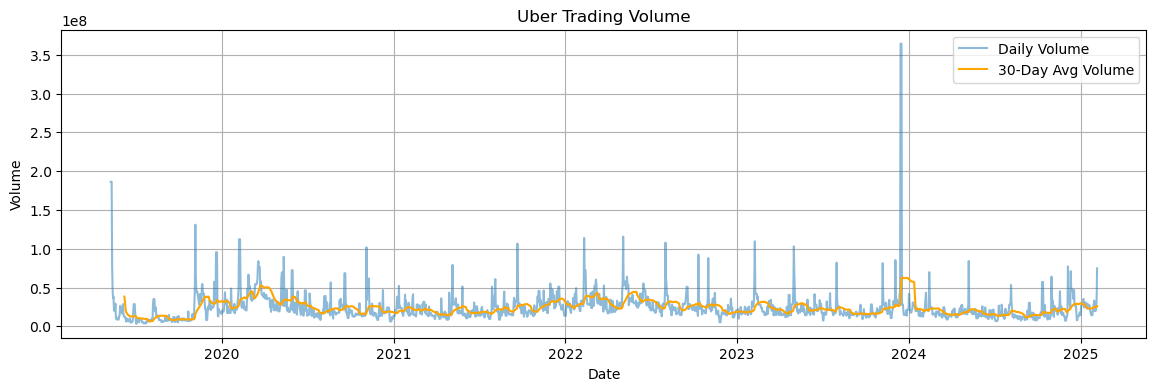

In [21]:
## 3.3 Trading Volume Over Time
plt.figure(figsize=(14,4))
plt.plot(df['Volume'], alpha=0.5, label='Daily Volume')
plt.plot(df['Volume'].rolling(30).mean(), label='30-Day Avg Volume', color='orange')
plt.title('Uber Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

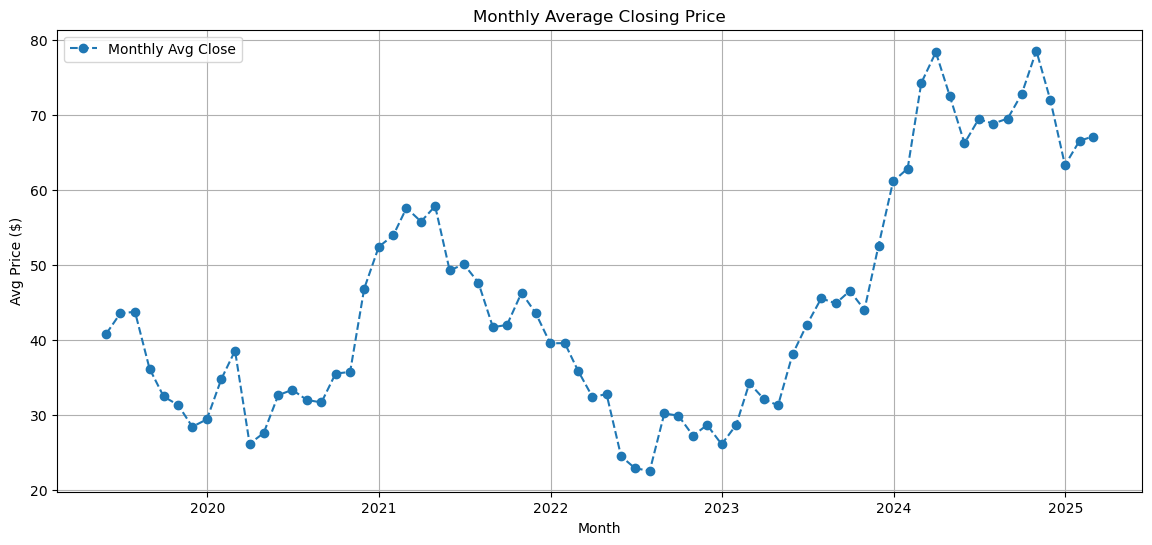

In [22]:
## 3.4 Monthly Average Closing Price
monthly_avg = df['Close'].resample('ME').mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_avg, marker='o', linestyle='--', label='Monthly Avg Close')
plt.title('Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Avg Price ($)')
plt.grid(True)
plt.legend()
plt.show()

# Optionally save for Power BI
monthly_avg.to_csv('monthly_avg_price.csv')


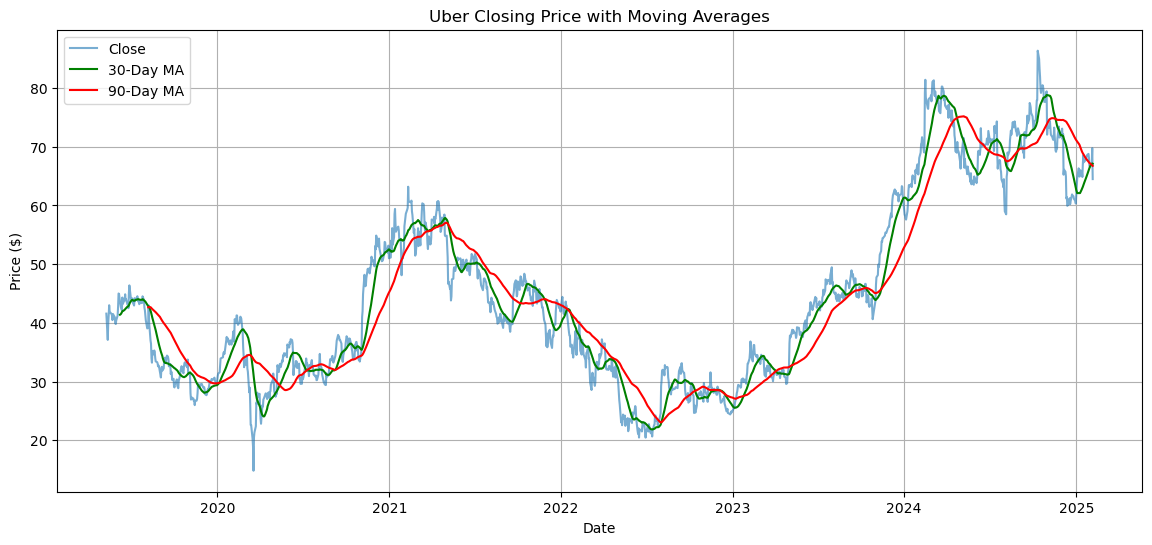

In [23]:
## 3.5 Rolling Averages (30-day and 90-day)
df['MA30'] = df['Close'].rolling(30).mean()
df['MA90'] = df['Close'].rolling(90).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close', alpha=0.6)
plt.plot(df['MA30'], label='30-Day MA', color='green')
plt.plot(df['MA90'], label='90-Day MA', color='red')
plt.title('Uber Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

This EDA section includes:

1. Line plot of stock price

2. Highest/lowest value detection

3. Trading volume with 30-day average

4. Monthly average prices

5. Rolling averages (30 & 90 days)

In [25]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/Users/nandhu/Downloads/uber_stock_data.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set date as index and sort
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# ⏱️ Set daily frequency and fill gaps
df = df.asfreq('D')
df['Close'] = df['Close'].interpolate()      # Interpolate missing close prices
df['Volume'] = df['Volume'].ffill()          # Forward-fill missing volume

In [26]:
#pip install pmdarima

In [27]:
#conda install -c conda-forge pmdarima

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6123.532, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6122.237, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6123.183, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6123.274, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6120.468, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.413 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2099
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3059.234
Date:                Wed, 10 Dec 2025   AIC                           6120.468
Time:                        16:09:26   BIC                           6126.117
Sample:                    05-10-2019   HQIC                          6122.537
                         - 02-05-2025                                       

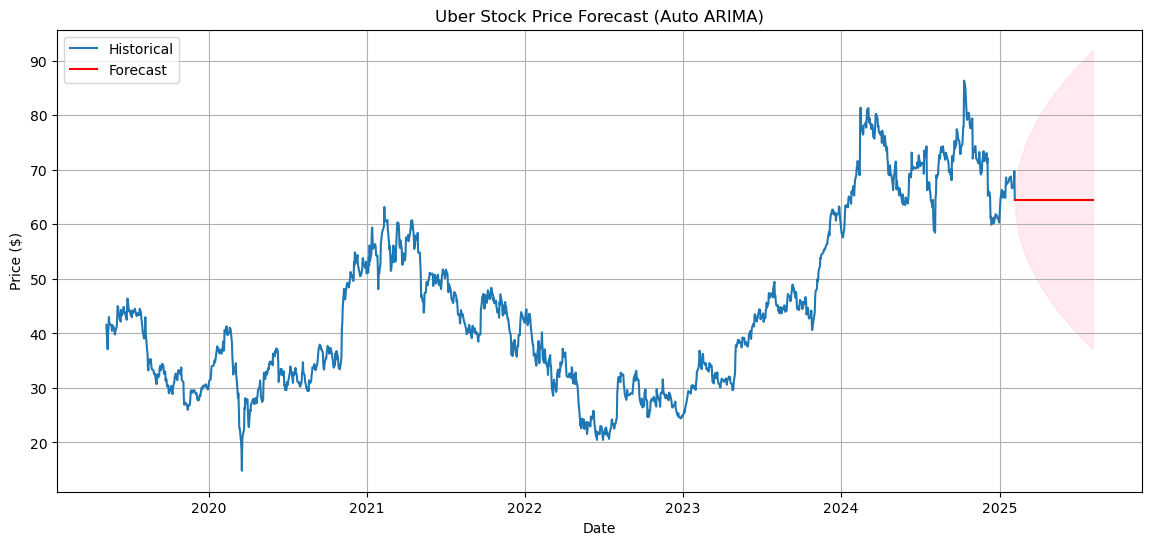

In [28]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Fit auto ARIMA model
stepwise_model = auto_arima(df['Close'], 
                            start_p=1, start_q=1,
                            max_p=5, max_q=5, 
                            d=1, seasonal=False,
                            trace=True, error_action='ignore', suppress_warnings=True)

# Summary
print(stepwise_model.summary())

# Forecast future values (180 days)
n_periods = 180
forecast_auto, conf_int = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)

# Forecast index
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_periods)

# Plot
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast_index, forecast_auto, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Uber Stock Price Forecast (Auto ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

Uber Stock Price Forecast using ARIMA Model:

The Auto ARIMA model was used to forecast the future stock prices of Uber based on historical daily closing prices. The model selection was performed using stepwise AIC minimization, and the best-fitted model was ARIMA(0,1,0), which indicates a simple random walk with no autoregressive or moving average components.

Diagnostic Checks:

Jarque-Bera Test (Normality): p-value ≈ 0 → Residuals not normally distributed.

Ljung-Box Test (Autocorrelation): p-value = 0.31 → Residuals are not significantly autocorrelated.

Heteroskedasticity: Prob(H) = 0 → Presence of heteroskedasticity.

Forecast Results:

The forecast graph shows a projected future price with a confidence interval, represented by the shaded pink region. The red line indicates the point forecast values for future dates, while the historical values are shown in blue.

The forecast suggests a stabilization in the stock price trend for the near future. The uncertainty band widens, indicating increased uncertainty as we predict further into the future.

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [31]:
#model performance
# 1. Split data into train and test (adjust test_size as needed)
train = df['Close'][:-30]   # last 30 days as test
test = df['Close'][-30:]    # actual values to compare

# 2. Fit the model on training data
from pmdarima import auto_arima

model_arima = auto_arima(train, seasonal=False, trace=True)
model_arima.fit(train)

# 3. Forecast for the test period
forecast_arima = model_arima.predict(n_periods=len(test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6020.231, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6020.101, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6020.459, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6020.610, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6018.377, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6020.384, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.788 seconds


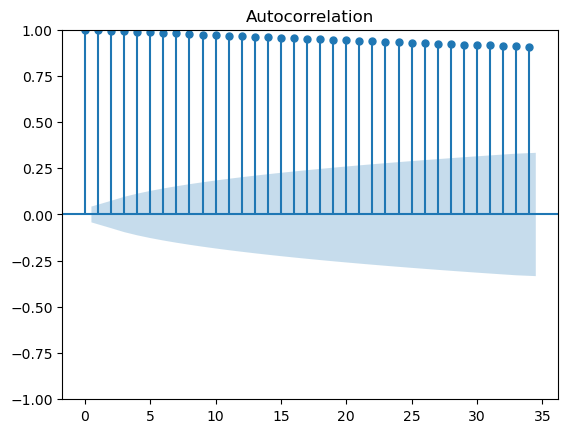

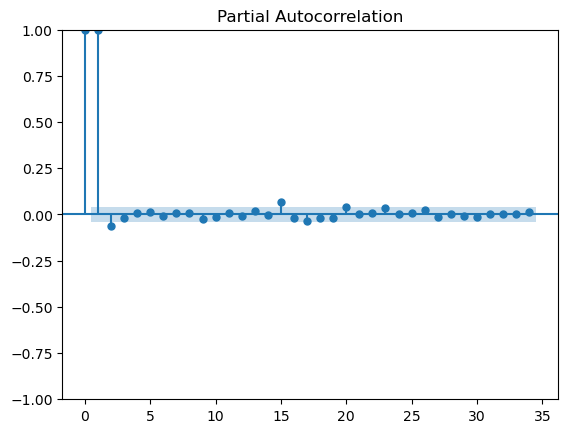

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Close'])
plot_pacf(df['Close'])
plt.show()

In [33]:
# forecast_arima contains your predicted values
# test contains the actual values for the same period

rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
mae_arima = mean_absolute_error(test, forecast_arima)

print(f"ARIMA RMSE: {rmse_arima:.2f}")
print(f"ARIMA MAE: {mae_arima:.2f}")

ARIMA RMSE: 1.51
ARIMA MAE: 1.29


The ARIMA model achieves RMSE = 1.51 and MAE = 1.29, indicating strong performance and good predictive accuracy for Uber stock prices

In [35]:
#conda install -c conda-forge prophet

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the Uber stock dataset
df = pd.read_csv('/Users/nandhu/Downloads/uber_stock_data.csv')

# Convert 'Date' to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Resample to daily frequency
df = df.asfreq('D')
df['Close'] = df['Close'].interpolate()
df['Volume'] = df['Volume'].ffill()

In [37]:
import warnings
warnings.filterwarnings('ignore')

16:09:28 - cmdstanpy - INFO - Chain [1] start processing
16:09:28 - cmdstanpy - INFO - Chain [1] done processing


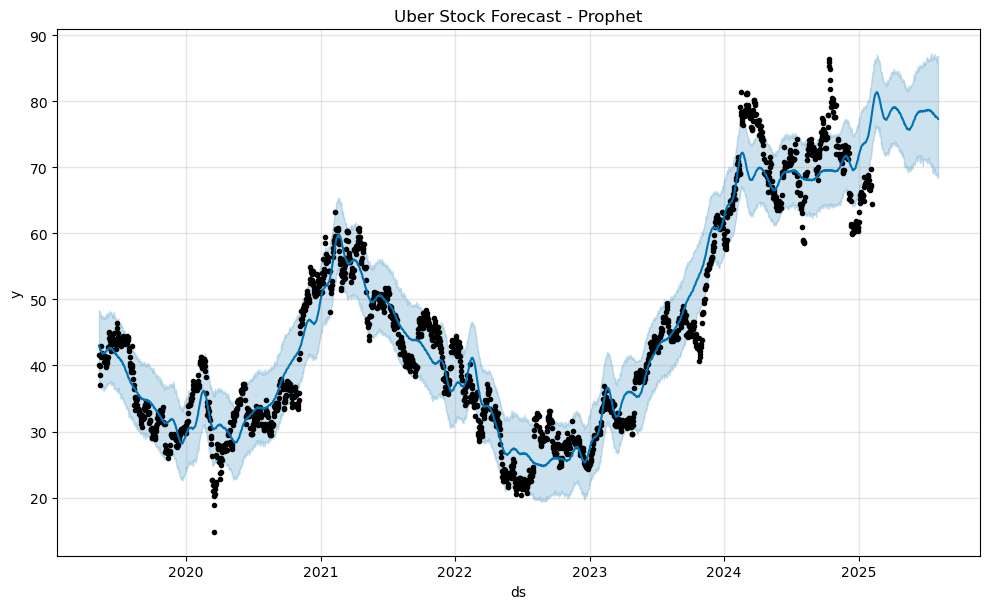

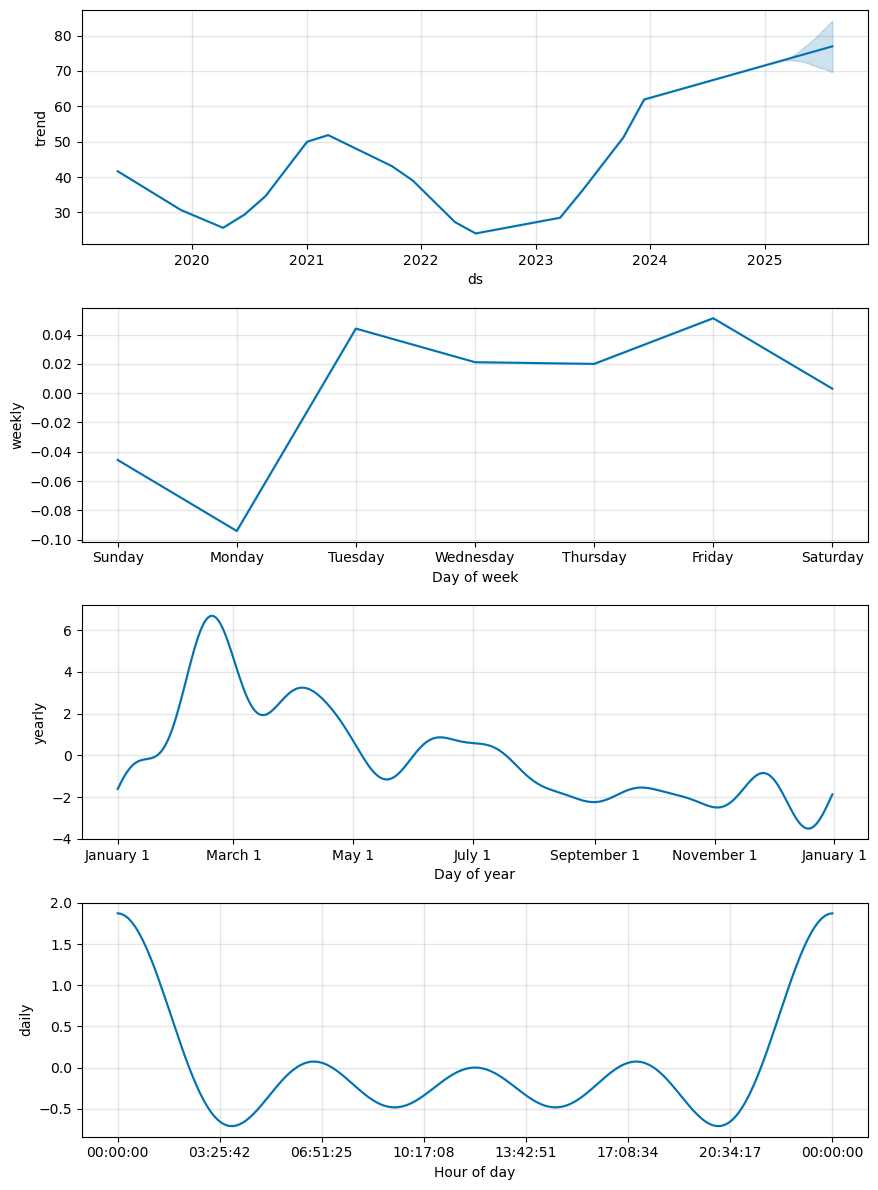

In [38]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare for Prophet
df_prophet = df.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit model
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Create future dates
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Uber Stock Forecast - Prophet')
plt.grid(True)
plt.show()

# Plot seasonality/trend components
model.plot_components(forecast)
plt.show()

# Optional: Export forecast
forecast[['ds', 'yhat']].to_csv('prophet_forecast.csv', index=False)

Uber Stock Price Forecast using Prophet Model:

The Facebook Prophet model was used to forecast Uber stock prices. It identified key components of stock behavior such as long-term trends, weekly trading cycles, and yearly patterns. The forecast shows a positive outlook into 2025, with prices expected to trend upward.

Key Components:

Trend: Long-term upward movement, recovering from past volatility.

Weekly Seasonality: Stronger performance observed mid-week; Mondays show a dip.

Yearly Seasonality: Price peaks around March and June; dips toward year-end.

Daily Pattern: Intra-day fluctuations indicate active trading periods.

In [40]:
#MODEL PERFORMANCE
# 1. Split Prophet data
train_prophet = df_prophet[:-30]
test_prophet = df_prophet[-30:]

In [41]:
from prophet import Prophet

model_prophet = Prophet()
model_prophet.fit(train_prophet)

# Create future dataframe and forecast
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

16:09:29 - cmdstanpy - INFO - Chain [1] start processing
16:09:29 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
# Only the predicted 'yhat' values for the last 30 days
forecast_prophet = forecast[['ds', 'yhat']].set_index('ds').loc[test_prophet['ds']]

# Actual test values
y_true = test_prophet.set_index('ds')['y']
y_pred = forecast_prophet['yhat']

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
mae_prophet = mean_absolute_error(y_true, y_pred)

print(f"Prophet RMSE: {rmse_prophet:.2f}")
print(f"Prophet MAE: {mae_prophet:.2f}")


Prophet RMSE: 13.96
Prophet MAE: 13.85


Prophet shows significantly higher errors (RMSE ≈ 14). This indicates its assumptions do not fit the dataset well.

In [45]:
print("Comparison of Model Performance:")
print(f"ARIMA → RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}")
print(f"Prophet → RMSE: {rmse_prophet:.2f}, MAE: {mae_prophet:.2f}")

Comparison of Model Performance:
ARIMA → RMSE: 1.51, MAE: 1.29
Prophet → RMSE: 13.96, MAE: 13.85


Conclusion:

Based on the evaluation metrics, ARIMA significantly outperforms Prophet on this dataset.
The series shows no strong seasonality, making ARIMA the more appropriate model.
The final ARIMA model provides stable and accurate forecasts, demonstrating its suitability for short-term stock price prediction.